<a href="https://colab.research.google.com/github/ethancraycroft/MLA_ETC/blob/main/MLA3_ETC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Machine Learning Assignment 3**
#**ETHAN CRAYCROFT**
#**CS430-ON**
#**Machine Learning in the Cloud**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Include imports for both SVC and SVR


In [2]:
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR

In [3]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [5]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Load the banknote_authentication.csv into a data frame named df.

In [7]:
df = pd.read_csv('/content/gdrive/My Drive/CS430/banknote_authentication.csv')

#Summarize the numerical columns of data.


In [8]:
df.describe()

,variance,skewness,curtosis,entropy,forgery
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


#Get the counts of forgery vs no forgery. Save this into a data frame so you can plot it.

In [9]:
forge = (df['forgery'] == 1).sum()
noForge = (df['forgery'] == 0).sum()
data = [['Yes', forge], ['No', noForge]]
forgeryDF = pd.DataFrame(data, columns=['Forgery?', 'Count'])
forgeryDF

,Forgery?,Count
0,Yes,610
1,No,762


#Create a barplot to view how many banknotes are forgeries and how many are not. The size of the plot should 10 x 5.


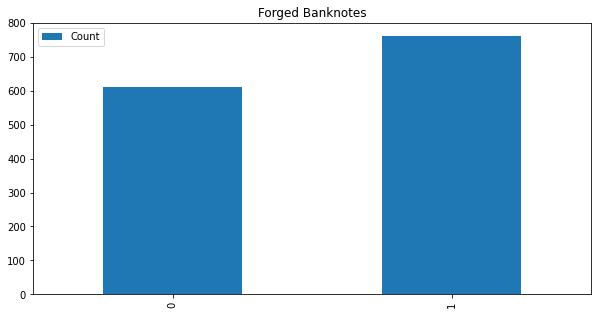

In [10]:
forgeryDF.plot(kind='bar', title="Forged Banknotes", figsize=(10, 5))

#Create a pairplot of all of the numerical variables using Seaborn.

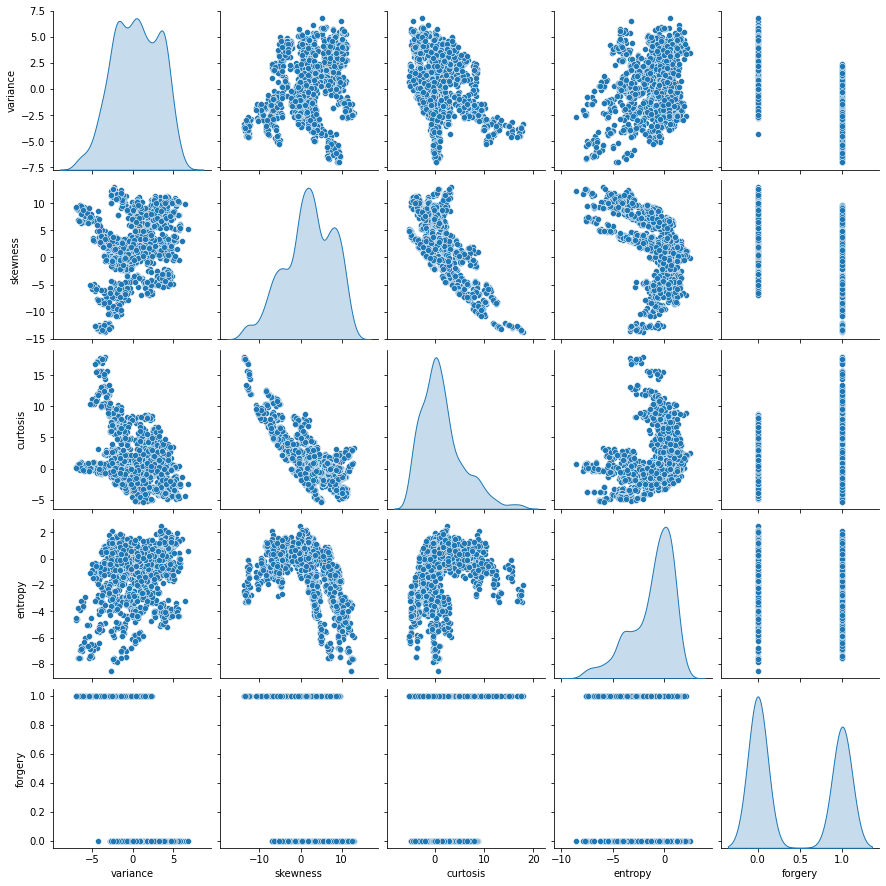

In [11]:
sns.pairplot(df,diag_kind="kde")

#In a Markdown comment - write up any interesting patterns you see from the pairplot.

I think one interesting conclusion that can be drawn from this pairplot is the correlation between skewness and curtosis. It appears their relationship is linear - as skewness increases, curtosis decreases (and vice versa). Most of the other data are kind of just blobs of data points with no super apparent correlations. 

#Create a data frame called X of your inputs that includes all columns except date and forgery.


In [12]:
X = df[['variance','skewness', 'curtosis', 'entropy']]
X

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


#Create a data frame called y of your output that includes only forgery. This will be your target variable that you are trying to predict.


In [13]:
y = df['forgery']
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: forgery, Length: 1372, dtype: int64

#Split the data into Train/Test sets.  Use 20% of the data for testing. You should have 4 data frames X_train, X_test, y_train,  and y_test.


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=7)

#Create a column transformer that will MinMax scale the numerical variables 


In [15]:
num_attributes = ['variance', 'skewness', 'curtosis', 'entropy']
col_transform = ColumnTransformer(transformers=[
                               ('num',MinMaxScaler(),num_attributes),]
                  )

#Create a pipeline that will transform the data and then run a SVM Classification using the linear kernel.


In [16]:
pipeline = Pipeline([
                     ('trans', col_transform),
                     ('SVCLinear', SVC(kernel="linear", C=1, max_iter=100000)),
                     ])



#Run the pipeline to fit the SVC Classification model.


In [17]:
pipeline.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('SVCLinear', SVC(C=1, kernel='linear', max_iter=100000))])

#Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.


In [18]:
y_pred = pipeline.predict(X_test)

#Call the plot_cm function to generate the confusion matrix.


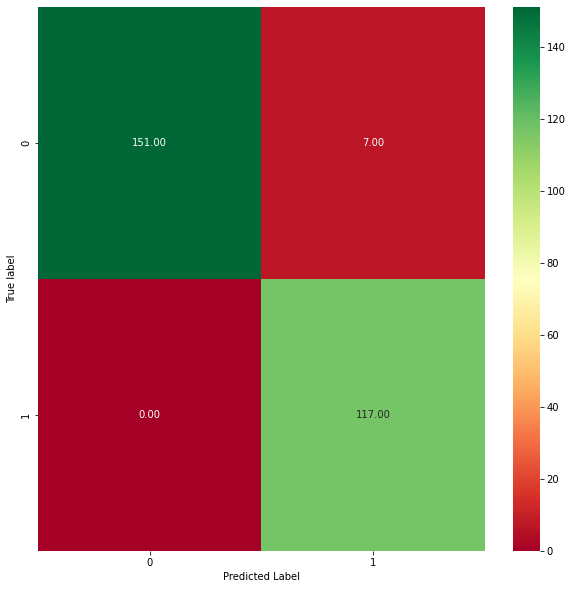

In [19]:
plot_cm(y_test,y_pred)


#Calculate the precision, recall, and F1 score. In a markdown comment below your results, interpret your results.


In [20]:
print("Precision: ", precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("F1 Score: ", f1_score(y_test,y_pred))

Precision:  0.9435483870967742
Recall:  1.0
F1 Score:  0.970954356846473


These scores are very good. A precision score of .94 is great and I would feel really comfortable using this model based on this. The precision calcultes the numbers of true positives over all predicted positives (including false positives). The closer this number is to 1 the better. Recall calculates the number of true positives over all true positives (including false negatives). The closer this number is to 1 the better. Here the recall score is 1 which is perfect and I would obviously feel comfortable with. The F1 score takes into account precision and recall, and an F1 score of 0.97 is very very good.

#In a Markdown comment, write a conclusion on how suitable you think this model is for predicting with or not a banknote is a forgery.

I would be extremely comfortable using this model to predict the forgery value. With very high precision, recall, and F1 scores, this makes me feel confident that the model will be very accurate in making its predictions. I feel confident that the number of false positives and false negatives would be very low compared to those predicted correctly.

#PART TWO

#Load the Steel_industry_data.csv into a data frame named df.


In [21]:
df = pd.read_csv('/content/gdrive/My Drive/CS430/Steel_industry_data.csv')

#Rename the columns according to Table 1: Columns Names.


In [22]:
df.rename(columns={"Usage_kWh": "usage_kwh", "Lagging_Current_Reactive.Power_kVarh": "lag_react_pwr_kvarh", "Leading_Current_Reactive_Power_kVarh": "lead_react_pwr_kvarh", "Lagging_Current_Power_Factor": "lag_current_pwr", "Leading_Current_Power_Factor": "lead_current_pwr", "NSM": "nsm", "WeekStatus": "week_status", "Day_of_week": "day_of_week", "Load_Type": "load_type",}, inplace=True)

#Create a data frame called X of your inputs that includes all columns except date and usage_kwh.


In [23]:
X = df.iloc[:,2:]
X

,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
0,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...
35035,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


#Create a data frame called y of your output that includes only usage_kwh. This will be your target variable that you are trying to predict.


In [24]:
y = df[['usage_kwh']]
y

,usage_kwh
0,3.17
1,4.00
2,3.24
3,3.31
4,3.82
...,...
35035,3.85
35036,3.74
35037,3.78
35038,3.78


#Split the data into Train/Test sets.  Use 20% of the data for testing. You should have 4 data frames X_train, X_test, y_train,  and y_test.


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=10)

#Create a column transformer that will OneHotEncode the categorical variables and MinMax scale the numerical variables (not the output).


In [26]:
num_attributes = ['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm']
cat_attributes = ['week_status', 'day_of_week', 'load_type']

col_transform = ColumnTransformer(transformers=[
                               ('cat',OneHotEncoder(), cat_attributes),
                               ('num',MinMaxScaler(), num_attributes),]
                  )

#Create a pipeline that will transform the data and then run an Support Vector Machine Regression.


In [27]:
pipelineSVM = Pipeline([
                     ('trans', col_transform),
                     ('SVR', SVR(kernel="linear", C=75, max_iter=100000, epsilon=0.0)),
                     ])

#Run the pipeline to fit the Support Vector Machine Regression.


In [28]:
pipelineSVM.fit(X_train,np.ravel(y_train))


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('SVR',
                 SVR(C=75, epsilon=0.0, kernel='linear', max_iter=100000))])

#Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.


In [29]:
y_pred = pipelineSVM.predict(X_test)


#Calculate the root mean squared error for both train and test. In a Markdown comment below the result, interpret the output you receive.


In [30]:
y_train_pred = pipelineSVM.predict(X_train)

train_RMSE = mean_squared_error(y_train, y_train_pred)**(0.5)
test_RMSE = mean_squared_error(y_test, y_pred)**(0.5)

In [31]:
print("Train RMSE: ", train_RMSE)
print("Test RMSE:", test_RMSE)

Train RMSE:  4.723463000329887
Test RMSE: 4.856555600006711


For this set of data, this model has a RMSE of 4.7 for the training data and 4.85 for the testing data. These values are very close which is ideal. The training number is the real number and the testing number is what is predicted. The closer these numbers are, the better the model is doing. 

#In a Markdown comment, write a conclusion on how suitable you think this model is for predicting kwh usage.


Judging by the Root Mean Squared Error for the train and test sets of data, I believe this model would be suitable for predicting usage_kwh. The test and train RMSE are very close in value, which is important. I would be comfortable using this model to predict the usage_kwh. 